In [1]:
#LIBRARIES
%matplotlib inline

import numpy as np #Scientific Computing packages
import pandas as pd #DataFrame
import os #for data files load
import matplotlib.pyplot as plt #to plot beautiful graphs 
import seaborn as sns #visualization tool
import plotly.plotly as py 
import plotly.graph_objs as go
import statsmodels.formula.api as stats
from IPython.display import display, HTML
from statsmodels.formula.api import ols
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
   

# ML project: World Happiness Report 
<img src="https://frontiermarketnews.files.wordpress.com/2017/03/coverhappy.jpg" width="550" height="100">


 ### PASAULIO LAIMĖS ATASKAITA

Pasaulio laimės ataskaita yra orientacinis pasaulinės laimės būklės tyrimas.Šitame Notebooke ištirsiu pačias naujausias ataskaitas - 2017, 2018, 2019 metų (Pastarieji du įkelti tik 2019 metų lapkričio pabaigoje). Ataskaita ir toliau sulaukia pasaulinio pripažinimo, nes vyriausybės, organizacijos ir pilietinė visuomenė vis dažniau naudojasi laimės rodikliais informuodamos apie savo politinius sprendimus. Ekonomika, psichologija, apklausų analizė, nacionalinė statistika, sveikata, viešoji politika ir kita - apibūdina, kaip gerovės matavimai gali būti efektyviai naudojami vertinant tautų pažangą. Ataskaitose apžvelgiama laimės būklė šiandieniniame pasaulyje ir parodoma, kaip naujasis laimės mokslas paaiškina asmeninius ir nacionalinius laimės variantus.Laimės rodyklis yra 10-balėje skalėje. 

## 1. Preparing and Describing the Data

In [2]:
#Load and prepare data files
happiness_2017 = pd.read_csv("C:\\Users\\eveli\\Desktop\\MLproject2\\ML_project\\2017.csv")
happiness_2017.columns = ['Happiness_Rank','Country','Happiness_Score', 'Whisker.high', 'Whisker.low',
       'Economy_GDP_per_capita','Family','Health', 'Freedom', 'Trust','Generosity', 'Dystopia.Residual']
columns_2017 = ['Whisker.high', 'Whisker.low', 'Dystopia.Residual']
new_happiness_2017 = happiness_2017.drop(columns_2017, axis=1)

happiness_2018 =  pd.read_csv("C:\\Users\\eveli\\Desktop\\MLproject2\\ML_project\\2018.csv")
happiness_2018.columns = ['Happiness_Rank','Country','Happiness_Score','Economy_GDP_per_capita','Family',
                          'Health', 'Freedom', 'Trust','Generosity']
happiness_2019 =  pd.read_csv("C:\\Users\\eveli\\Desktop\\MLproject2\\ML_project\\2019.csv")
happiness_2019.columns =['Happiness_Rank','Country','Happiness_Score','Economy_GDP_per_capita','Family',
                          'Health', 'Freedom', 'Trust','Generosity']
frames = [happiness_2019, happiness_2018, new_happiness_2017]
happiness = pd.concat(frames)

In [3]:
n_happiness_2017 = new_happiness_2017.rename(lambda x: (x + '_2017' if 'Country' != x else x), axis='columns')

n_happiness_2018 = happiness_2018.rename(lambda x: (x + '_2018' if 'Country' != x else x), axis='columns')

n_happiness_2019 = happiness_2019.rename(lambda x: (x + '_2019' if 'Country' != x else x), axis='columns')


happiness2 = pd.merge(n_happiness_2017, n_happiness_2018, on='Country', how='inner')
happiness2 = pd.merge(happiness2, n_happiness_2019, on='Country', how='inner')

Sujungiau 3 duomenų failus 2 skirtingais būdais: 

* Eilutėmys (lentelė po lentele) 
* Stulpeliais (lentelė prie lentelės pakeitus stulpeliu pavadinimus)

In [4]:
happiness.info() #information about new dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 154
Data columns (total 9 columns):
Happiness_Rank            467 non-null int64
Country                   467 non-null object
Happiness_Score           467 non-null float64
Economy_GDP_per_capita    467 non-null float64
Family                    467 non-null float64
Health                    467 non-null float64
Freedom                   467 non-null float64
Trust                     467 non-null float64
Generosity                466 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 36.5+ KB


In [5]:
happiness.head(10) #top 10

,Happiness_Rank,Country,Happiness_Score,Economy_GDP_per_capita,Family,Health,Freedom,Trust,Generosity
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [6]:
happiness2.info() #information about new dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 25 columns):
Happiness_Rank_2017            147 non-null int64
Country                        147 non-null object
Happiness_Score_2017           147 non-null float64
Economy_GDP_per_capita_2017    147 non-null float64
Family_2017                    147 non-null float64
Health_2017                    147 non-null float64
Freedom_2017                   147 non-null float64
Trust_2017                     147 non-null float64
Generosity_2017                147 non-null float64
Happiness_Rank_2018            147 non-null int64
Happiness_Score_2018           147 non-null float64
Economy_GDP_per_capita_2018    147 non-null float64
Family_2018                    147 non-null float64
Health_2018                    147 non-null float64
Freedom_2018                   147 non-null float64
Trust_2018                     147 non-null float64
Generosity_2018                146 non-null float64
Happiness_Rank_2

In [7]:
display(HTML(happiness2.head(10).to_html())) 

,Happiness_Rank_2017,Country,Happiness_Score_2017,Economy_GDP_per_capita_2017,Family_2017,Health_2017,Freedom_2017,Trust_2017,Generosity_2017,Happiness_Rank_2018,Happiness_Score_2018,Economy_GDP_per_capita_2018,Family_2018,Health_2018,Freedom_2018,Trust_2018,Generosity_2018,Happiness_Rank_2019,Happiness_Score_2019,Economy_GDP_per_capita_2019,Family_2019,Health_2019,Freedom_2019,Trust_2019,Generosity_2019
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
1,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
3,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
4,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
5,6,Netherlands,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,6,7.441,1.361,1.488,0.878,0.638,0.333,0.295,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,7,Canada,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,7,7.328,1.330,1.532,0.896,0.653,0.321,0.291,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308
7,8,New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,8,7.324,1.268,1.601,0.876,0.669,0.365,0.389,8,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Sweden,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,9,7.314,1.355,1.501,0.913,0.659,0.285,0.383,7,7.343,1.387,1.487,1.009,0.574,0.267,0.373
9,10,Australia,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,10,7.272,1.340,1.573,0.910,0.647,0.361,0.302,11,7.228,1.372,1.548,1.036,0.557,0.332,0.290


In [8]:
display(HTML(happiness2.tail(10).to_html()))

,Happiness_Rank_2017,Country,Happiness_Score_2017,Economy_GDP_per_capita_2017,Family_2017,Health_2017,Freedom_2017,Trust_2017,Generosity_2017,Happiness_Rank_2018,Happiness_Score_2018,Economy_GDP_per_capita_2018,Family_2018,Health_2018,Freedom_2018,Trust_2018,Generosity_2018,Happiness_Rank_2019,Happiness_Score_2019,Economy_GDP_per_capita_2019,Family_2019,Health_2019,Freedom_2019,Trust_2019,Generosity_2019
137,146,Yemen,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,152,3.355,0.442,1.073,0.343,0.244,0.083,0.064,151,3.380,0.287,1.163,0.463,0.143,0.108,0.077
138,147,South Sudan,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,154,3.254,0.337,0.608,0.177,0.112,0.224,0.106,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091
139,148,Liberia,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,149,3.495,0.076,0.858,0.267,0.419,0.206,0.030,141,3.975,0.073,0.922,0.443,0.370,0.233,0.033
140,149,Guinea,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,140,3.964,0.344,0.792,0.211,0.394,0.185,0.094,118,4.534,0.380,0.829,0.375,0.332,0.207,0.086
141,150,Togo,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,139,3.999,0.259,0.474,0.253,0.434,0.158,0.101,139,4.085,0.275,0.572,0.410,0.293,0.177,0.085
142,151,Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,151,3.408,0.332,0.896,0.400,0.636,0.200,0.444,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
143,152,Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,150,3.462,0.689,0.382,0.539,0.088,0.376,0.144,149,3.462,0.619,0.378,0.440,0.013,0.331,0.141
144,153,Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,153,3.303,0.455,0.991,0.381,0.481,0.270,0.097,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
145,154,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,156,2.905,0.091,0.627,0.145,0.065,0.149,0.076,145,3.775,0.046,0.447,0.380,0.220,0.176,0.180
146,155,Central African Republic,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,155,3.083,0.024,0.000,0.010,0.305,0.218,0.038,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [9]:
happiness.describe() #main statistic information 

,Happiness_Rank,Happiness_Score,Economy_GDP_per_capita,Family,Health,Freedom,Trust,Generosity
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000
mean,78.334047,5.379064,0.926981,1.203681,0.624800,0.418642,0.204154,0.115231
std,44.985594,1.119092,0.405078,0.295919,0.252756,0.154046,0.114708,0.097554
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.500000,4.511500,0.628203,1.051500,0.454714,0.313000,0.120000,0.052000
50%,78.000000,5.339000,0.986000,1.258190,0.657000,0.443323,0.190134,0.086362
75%,117.000000,6.170500,1.245000,1.440726,0.817500,0.535500,0.262500,0.143750
max,156.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.464308


In [10]:
(HTML(happiness2.describe().to_html()))

,Happiness_Rank_2017,Happiness_Score_2017,Economy_GDP_per_capita_2017,Family_2017,Health_2017,Freedom_2017,Trust_2017,Generosity_2017,Happiness_Rank_2018,Happiness_Score_2018,Economy_GDP_per_capita_2018,Family_2018,Health_2018,Freedom_2018,Trust_2018,Generosity_2018,Happiness_Rank_2019,Happiness_Score_2019,Economy_GDP_per_capita_2019,Family_2019,Health_2019,Freedom_2019,Trust_2019,Generosity_2019
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,146.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,78.061224,5.353306,0.975832,1.186786,0.550546,0.412457,0.246721,0.124117,78.374150,5.381272,0.884510,1.211544,0.596184,0.457565,0.181571,0.112055,77.931973,5.421429,0.903150,1.210680,0.728061,0.393299,0.182932,0.109619
std,45.240487,1.143009,0.424641,0.293857,0.234424,0.145472,0.137196,0.102571,45.488401,1.132560,0.396389,0.309484,0.247038,0.157340,0.100771,0.097512,45.479886,1.127361,0.397578,0.303262,0.235339,0.145083,0.096625,0.095398
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.030370,0.000000,0.000000,1.000000,2.905000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,1.000000,2.853000,0.000000,0.000000,0.105000,0.000000,0.000000,0.000000
25%,39.500000,4.505500,0.642432,1.006861,0.369866,0.303677,0.152574,0.056919,39.500000,4.451500,0.577000,1.047500,0.420500,0.356000,0.107000,0.050250,39.000000,4.553500,0.594500,1.057000,0.555000,0.300500,0.107500,0.047000
50%,79.000000,5.273000,1.054699,1.255585,0.606042,0.437454,0.230947,0.089981,79.000000,5.358000,0.940000,1.265000,0.645000,0.481000,0.175000,0.082000,78.000000,5.386000,0.960000,1.274000,0.789000,0.418000,0.175000,0.085000
75%,116.500000,6.101500,1.303185,1.422857,0.715975,0.517398,0.323997,0.153296,117.500000,6.170000,1.182000,1.467000,0.773500,0.579000,0.242500,0.135750,116.500000,6.190000,1.221000,1.454500,0.881000,0.508000,0.245500,0.139000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,156.000000,7.632000,2.096000,1.644000,1.008000,0.724000,0.598000,0.457000,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


## 2. Data visualization 

In [11]:
data2 = dict(type = 'choropleth', 
           locations = happiness_2019['Country'],
           locationmode = 'country names',
           z = happiness_2019['Happiness_Score'], 
           text = happiness_2019['Country'],
           colorscale = 'Viridis',
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Happiness Score Across the World',   geo = dict(showframe = False))
choromap3 = go.Figure(data = [data2], layout=layout)
iplot(choromap3)

Aukščiau pateiktas žemėlapis rodo 2019 metų laimės rodyklį kiekvienai šaliai :) 

In [12]:
data6 = dict(type = 'choropleth', 
           locations = happiness_2019['Country'],
           locationmode = 'country names',
           z = happiness_2019['Happiness_Rank'], 
           text = happiness_2019['Country'],
          colorscale = 'RdBu', reversescale = False,
          colorbar = {'title':'Happiness Rank'})
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False))
choromap6 = go.Figure(data = [data6], layout=layout)
iplot(choromap6)

Šis žemėlapis parodo kurioje vietoje pagal laimės rodyklį yra šalis reitinge (2019m.)

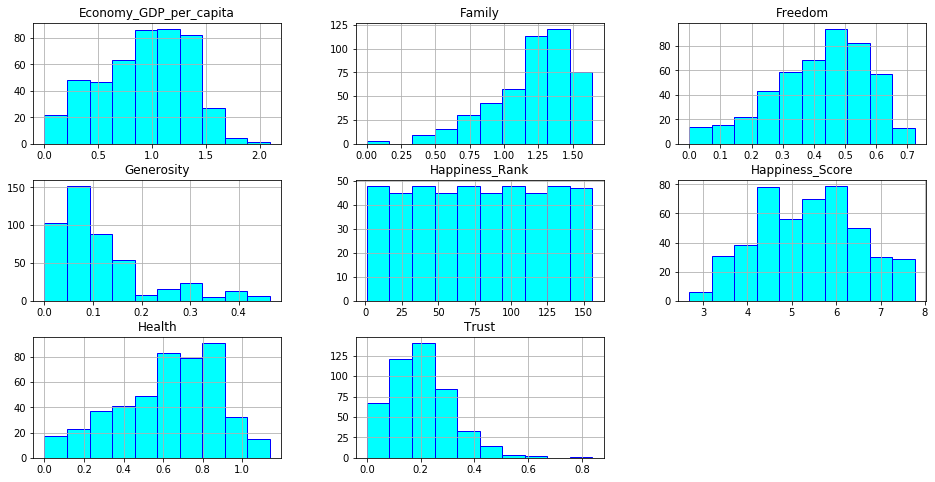

In [13]:
happiness.hist(edgecolor = 'blue', linewidth = 1, figsize = (16,8), color='aqua') 
plt.show()

Histogramos parodo dataseto skaitinių reikšmių pasiskirstymą. Iš šito grafiko galima teigti, kad datasetas yra tvarkingas, tik "Happiness_Rank" stulpelis yra nenaudingas modeliuose. 

## 3.Correlations between attributes

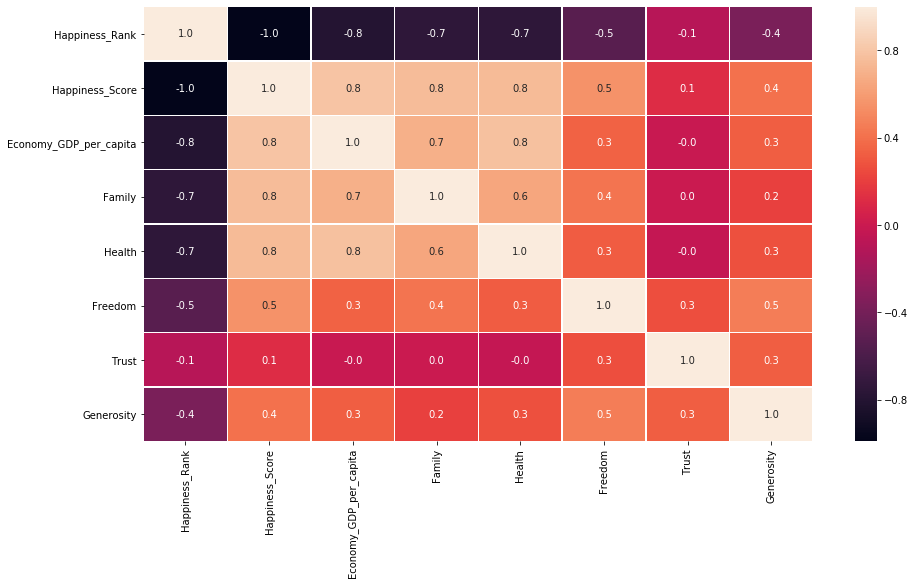

In [14]:
#Correlation Map
f,ax = plt.subplots(figsize=(15, 8))
sns.heatmap(happiness.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Iš aukščiau gautos lentelės matome, kad didžiausia įtaka, iš nagrinėjamų duomenų, <u>Laimės Rodykliui</u> turi Ekonomika (GDP per capita), Sveikata bei Šeima (socialinė padėtis), o mažiausią - Pasitikėjimas Valdžia. 
<br><br>Žemiau pateiksiu grafiškai kelias koreliacijas.  

In [15]:
trace4 = go.Scatter(
    x = happiness.Happiness_Score,
    y = happiness.Economy_GDP_per_capita,
    mode = 'markers')
data4 = [trace4]
layout = go.Layout(
    title='Economy GDP per capita Determined by Score',
    xaxis=dict(
        title='Happiness Score',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )),
    yaxis=dict(
        title='Economy GDP per capita',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )))


In [16]:
fig4 = go.Figure(data=data4, layout=layout)
iplot(fig4)

In [17]:
trace4 = go.Scatter(
    x = happiness.Happiness_Score,
    y = happiness.Trust,
    mode = 'markers'
)
data4 = [trace4]
layout = go.Layout(
    title='Trust Determined by Score',
    xaxis=dict(
        title='Happiness Score',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    ),
    yaxis=dict(
        title='Trust',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    )
)



In [18]:
fig4 = go.Figure(data=data4, layout=layout)
iplot(fig4)

Pirmas grafikas rodo koreliaciją (tarpusavio priklausomumą) tarp Ekonomikos ir Laimės Rodyklio. Taip pat atrodytų ir koreliacijos grafika Laimės Rodyklio su "Health" arba su "Family". <br><br>Antras grafikas, palyginimui, rodo Laimės rodyklio priklausomumą nuo Pasitikėjimo valdžia "Trust" - matome, kad silpnai priklauso. 

## 4. Transformations 

Iš aukščiau pavaizduotų grafikų ir koreliacijų, pastebiu, kad duomeys yra tvarkingi, bet Happiness_Rank stulpeliai modelyje mums nebus naudingi, o netgi klaidins jį.<br>Taigi dar ištrinsime, kad galutinai paruošti duomenis jau modeliui.   

In [19]:
columns_happiness2 =['Happiness_Rank_2017', 'Happiness_Rank_2018', 'Happiness_Rank_2019']
happiness22= happiness2.drop(columns_happiness2, axis=1)


## 5. Train and Test split

Atsitiktinai suskaidau duomenis i train ir test setus, kad nebūtų "overfitting".


In [20]:
np.random.seed(42)
mask = np.random.rand(happiness2.shape[0]) <= 0.7

print('Train set shape {0}, test set shape {1}'.format(happiness2[mask].shape, happiness2[~mask].shape))

Train set shape (102, 25), test set shape (45, 25)


In [21]:
np.random.seed(42)
mask2 = np.random.rand(happiness.shape[0]) <= 0.7

print('Train set shape {0}, test set shape {1}'.format(happiness[mask2].shape, happiness[~mask2].shape))

Train set shape (324, 9), test set shape (143, 9)


# 6. Models


## 6.1 Linear regression

Realizuosiu tiesinės regresijos modelį abiem lentelių sujungimam ir palyginsiu juos.
$$\min_w ||Xw - y||^2_2$$

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(happiness22[mask].drop(['Country', 'Happiness_Score_2017',
                               'Happiness_Score_2018','Happiness_Score_2019'], axis=1).fillna(0), 
       happiness22[mask]['Happiness_Score_2019'] )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 **ROOT MEAN SQUARE ERROR**
 $$RMSE=\sqrt{\sum \frac{(y_{pred}-y_{test})^2}{N}}$$


In [23]:
pred = lr.predict(happiness22[~mask].drop(['Country', 'Happiness_Score_2017', 'Happiness_Score_2018',
                                           'Happiness_Score_2019'], axis=1).fillna(0)) # X_test
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred - happiness22[~mask]['Happiness_Score_2019'])**2))))   # pred - y_test

RMSE = 0.6711


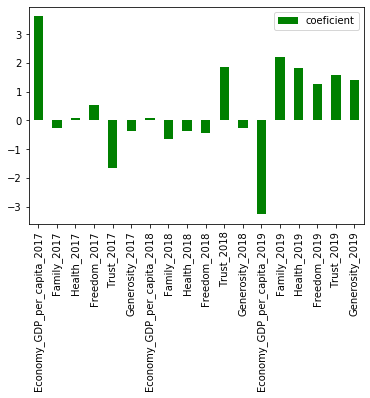

In [24]:
pd.DataFrame(lr.coef_, columns=['coeficient'],
    index=happiness22[mask].drop(['Country', 'Happiness_Score_2017','Happiness_Score_2018','Happiness_Score_2019'], axis=1).columns,
            ).plot(kind='bar', color='green')

Didžiausią įtaką šitame modelyje turi *Economy_GDP_per_capita_2017* koeficentas

In [25]:
lr.fit(happiness[mask2].drop(['Country', 'Happiness_Score', 'Happiness_Rank'], axis=1).fillna(0), #second dataset
      happiness[mask2]['Happiness_Score'] )
pred2 = lr.predict(happiness[~mask2].drop(['Country', 'Happiness_Score','Happiness_Rank'],
                                         axis=1).fillna(0))  # X_test2
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred2 - happiness[~mask2]['Happiness_Score'])**2))))   # pred - y_test2

RMSE = 0.5267


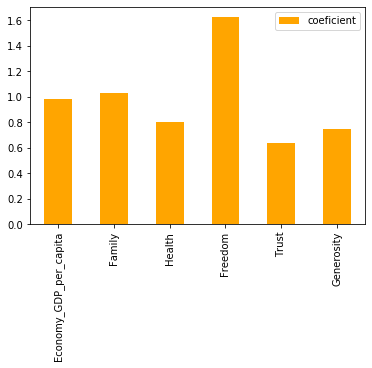

In [26]:
pd.DataFrame(lr.coef_, columns=['coeficient'],
    index=happiness[mask2].drop(['Country', 'Happiness_Score', 'Happiness_Rank'], axis=1).columns,
            ).plot(kind='bar', color='orange')

Antru atveju, visi koeficentai gaunasi teigiami ir svarbiausias yra *Freedom*

## 6.2 Randomforest 

Randomforest modelio realizavimas 2 atvejais

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(happiness22[mask].drop(['Country', 'Happiness_Score_2017',
                               'Happiness_Score_2018','Happiness_Score_2019'], axis=1).fillna(0), 
       happiness22[mask]['Happiness_Score_2019'] )
pred3 = rf.predict(happiness22[~mask].drop(['Country', 'Happiness_Score_2017',
                               'Happiness_Score_2018','Happiness_Score_2019'], axis=1).fillna(0))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred3 - happiness22[~mask]['Happiness_Score_2019'])**2))))

RMSE = 0.5917


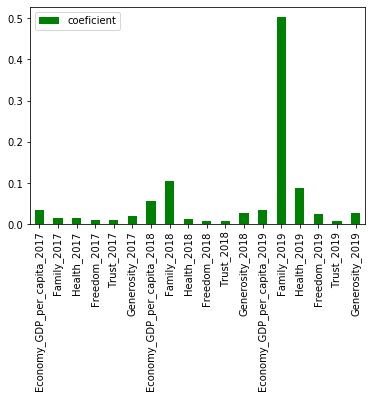

In [28]:
pd.DataFrame(rf.feature_importances_, columns=['coeficient'],
    index=happiness22[mask].drop(['Country', 'Happiness_Score_2017','Happiness_Score_2018','Happiness_Score_2019'], axis=1).columns,
            ).plot(kind='bar', color='green')

Randomforest atveju, didžiausią įtaką turi *Family_2019* stulpelis

In [29]:
rf.fit(happiness[mask2].drop(['Country', 'Happiness_Score', 'Happiness_Rank'], axis=1).fillna(0), 
       happiness[mask2]['Happiness_Score'] )
pred4 = rf.predict(happiness[~mask2].drop(['Country', 'Happiness_Score', 'Happiness_Rank'],
                                         axis=1).fillna(0)) 
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred4 - happiness[~mask2]['Happiness_Score'])**2))))  

RMSE = 0.4767


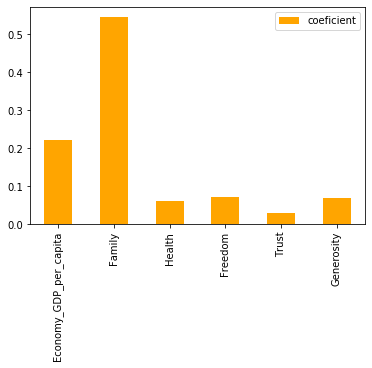

In [30]:
pd.DataFrame(rf.feature_importances_, columns=['coeficient'],
    index=happiness[mask2].drop(['Country', 'Happiness_Score', 'Happiness_Rank'], axis=1).columns,
            ).plot(kind='bar', color='orange')

Palyginus du atvejus **Random-forest** modelis yra pranašėsnis už **Linear regression**. Tą matome iš gautų RMSE. 


# 7. Ensemble methods 

## 7.1 Averaging

In [31]:
avepred=(pred+pred3)/2
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((avepred - happiness22[~mask]['Happiness_Score_2019'])**2))))

RMSE = 0.6095


In [32]:
avepred2=(pred2+pred4)/2
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((avepred2 - happiness[~mask2]['Happiness_Score'])**2))))

RMSE = 0.4771


#### Palyginus modelius, pastebiu, kad naudojant happiness (sujungimas eilutėmis) lentelę gauname gerėsnį modelį nei happiness2 (sujungimas stulpeliais) 

# Ačiū už dėmesį